In [78]:
#imports
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

from google.colab import files

plt.style.use('dark_background')

import plotly.graph_objects as go
from plotly.subplots import make_subplots

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.preprocessing import OneHotEncoder

import warnings
warnings.filterwarnings('ignore')

In [79]:
#upload the data file
uploadFile = files.upload()
heart = pd.read_csv('heart2025.csv')


Saving heart2025.csv to heart2025 (3).csv


In [80]:
#read the first few records of the data
heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [81]:
#read the last few records of the data
heart.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [82]:
#find number of rows and columns in the data set
heart.shape

(918, 12)

In [83]:
#basic stats
heart.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [84]:
#any null values we need to worry about?
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [85]:
#examine the y ('HeartDisease') variable
num = heart['HeartDisease'].value_counts()
num

,count
HeartDisease,
1,508
0,410


<Axes: xlabel='HeartDisease', ylabel='count'>

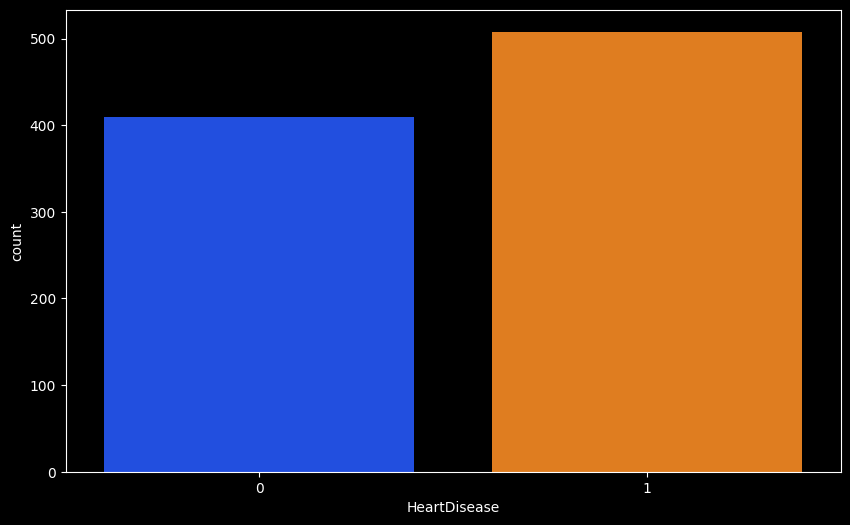

In [86]:
#visualization
fig = plt.figure(figsize=(10,6))
sns.countplot(x='HeartDisease',data=heart,palette='bright')

In [87]:
num# replacing values
heart['Sex'].replace(['M', 'F'],[0, 1], inplace=True)

In [88]:
heart

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,1,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,0,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,1,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,0,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,0,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,0,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,0,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,1,ATA,130,236,0,LVH,174,N,0.0,Flat,1


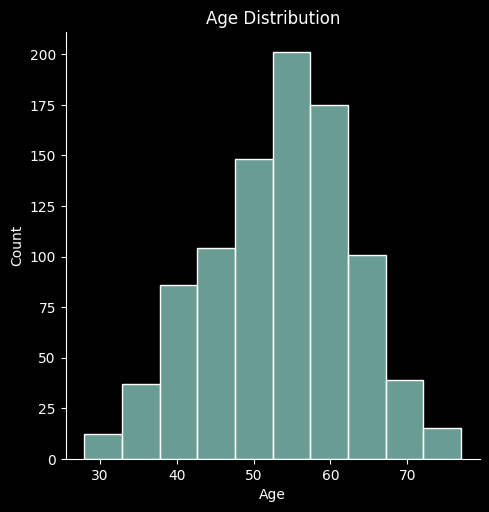

In [89]:
#age distribution - histogram
sns.displot(heart['Age'],bins=10)
plt.title('Age Distribution')
plt.show()

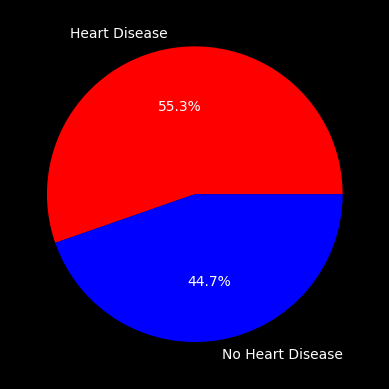

In [90]:
#Pie Chart
colors=['red','blue']
plt.pie(x=heart.HeartDisease.value_counts(),labels=['Heart Disease','No Heart Disease'],colors=colors,autopct='%1.1f%%')
plt.show()

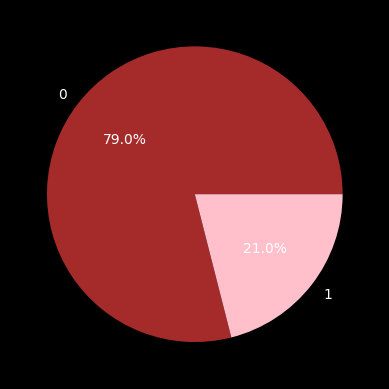

In [91]:
#Visualization
colors = ['brown','pink']
plt.pie(x=heart.Sex.value_counts(),labels=heart.Sex.value_counts().index,colors=colors,autopct='%1.1f%%')
plt.show()

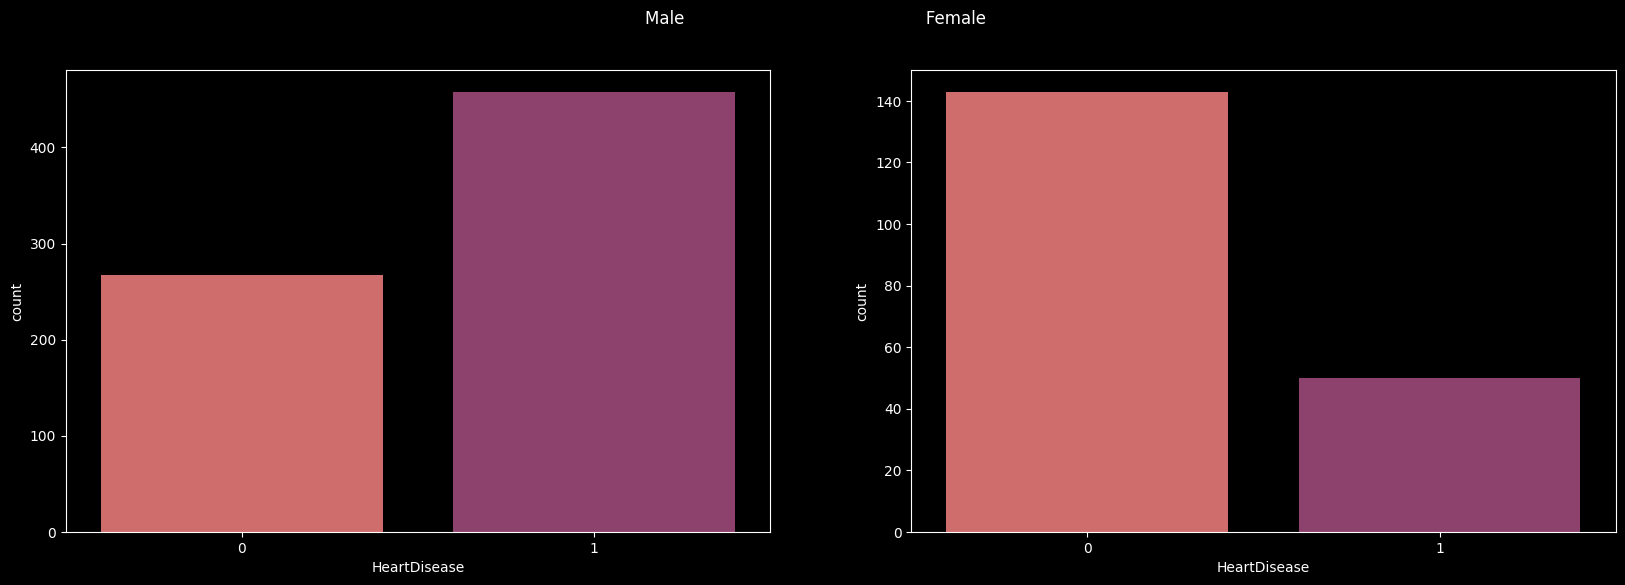

In [92]:
#Visualization
X = heart[heart['Sex']==0]
Y = heart[heart['Sex']==1]
fig, ax1 = plt.subplots(1,2,figsize=(20,6))
plt.suptitle("Male                                              Female")

sns.countplot(x='HeartDisease',data=X,palette='flare',ax=ax1[0])
sns.countplot(x='HeartDisease',data=Y,palette='flare',ax=ax1[1])
fig.show()


In [93]:
#Box and Whisker Plots
fig = go.Figure()

fig.add_trace(go.Box(y=X['Age'],name="Male",marker_color='blue',boxpoints='all',whiskerwidth=0.3))
fig.add_trace(go.Box(y=Y['Age'],name="Female",marker_color='pink',boxpoints='all',whiskerwidth=0.3))
fig.update_layout(template="plotly_dark",title="Age Distribution",height=600)
fig.show()

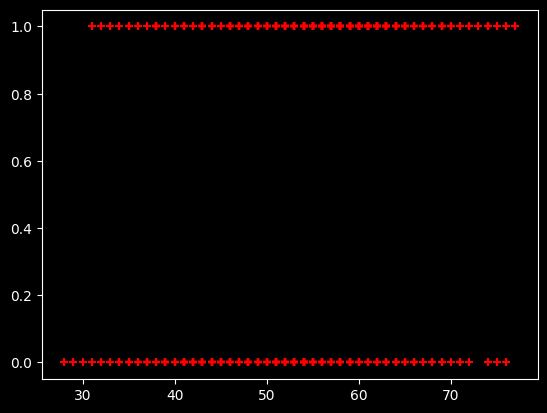

In [94]:
#Sample scatterplot
plt.scatter(heart.Age,heart.HeartDisease,marker='+',color='red')

In [95]:
#Swarm Plots for some categorical variables
classColumns = ['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']
classData = heart[classColumns]

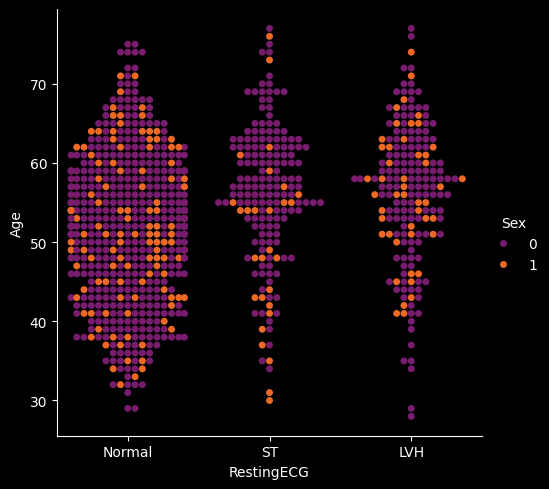

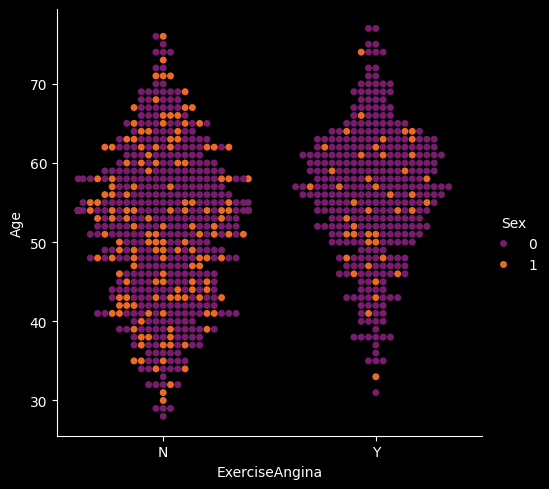

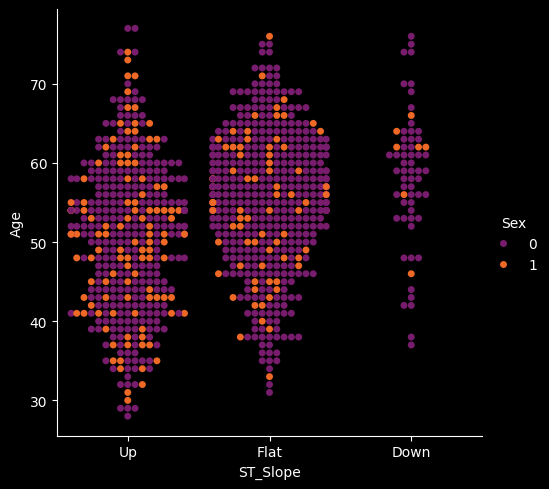

In [96]:
for col in classColumns[2:]:
  sns.catplot(kind='swarm',data=heart,x=col,y='Age',palette='inferno',hue='Sex')
  plt.show()

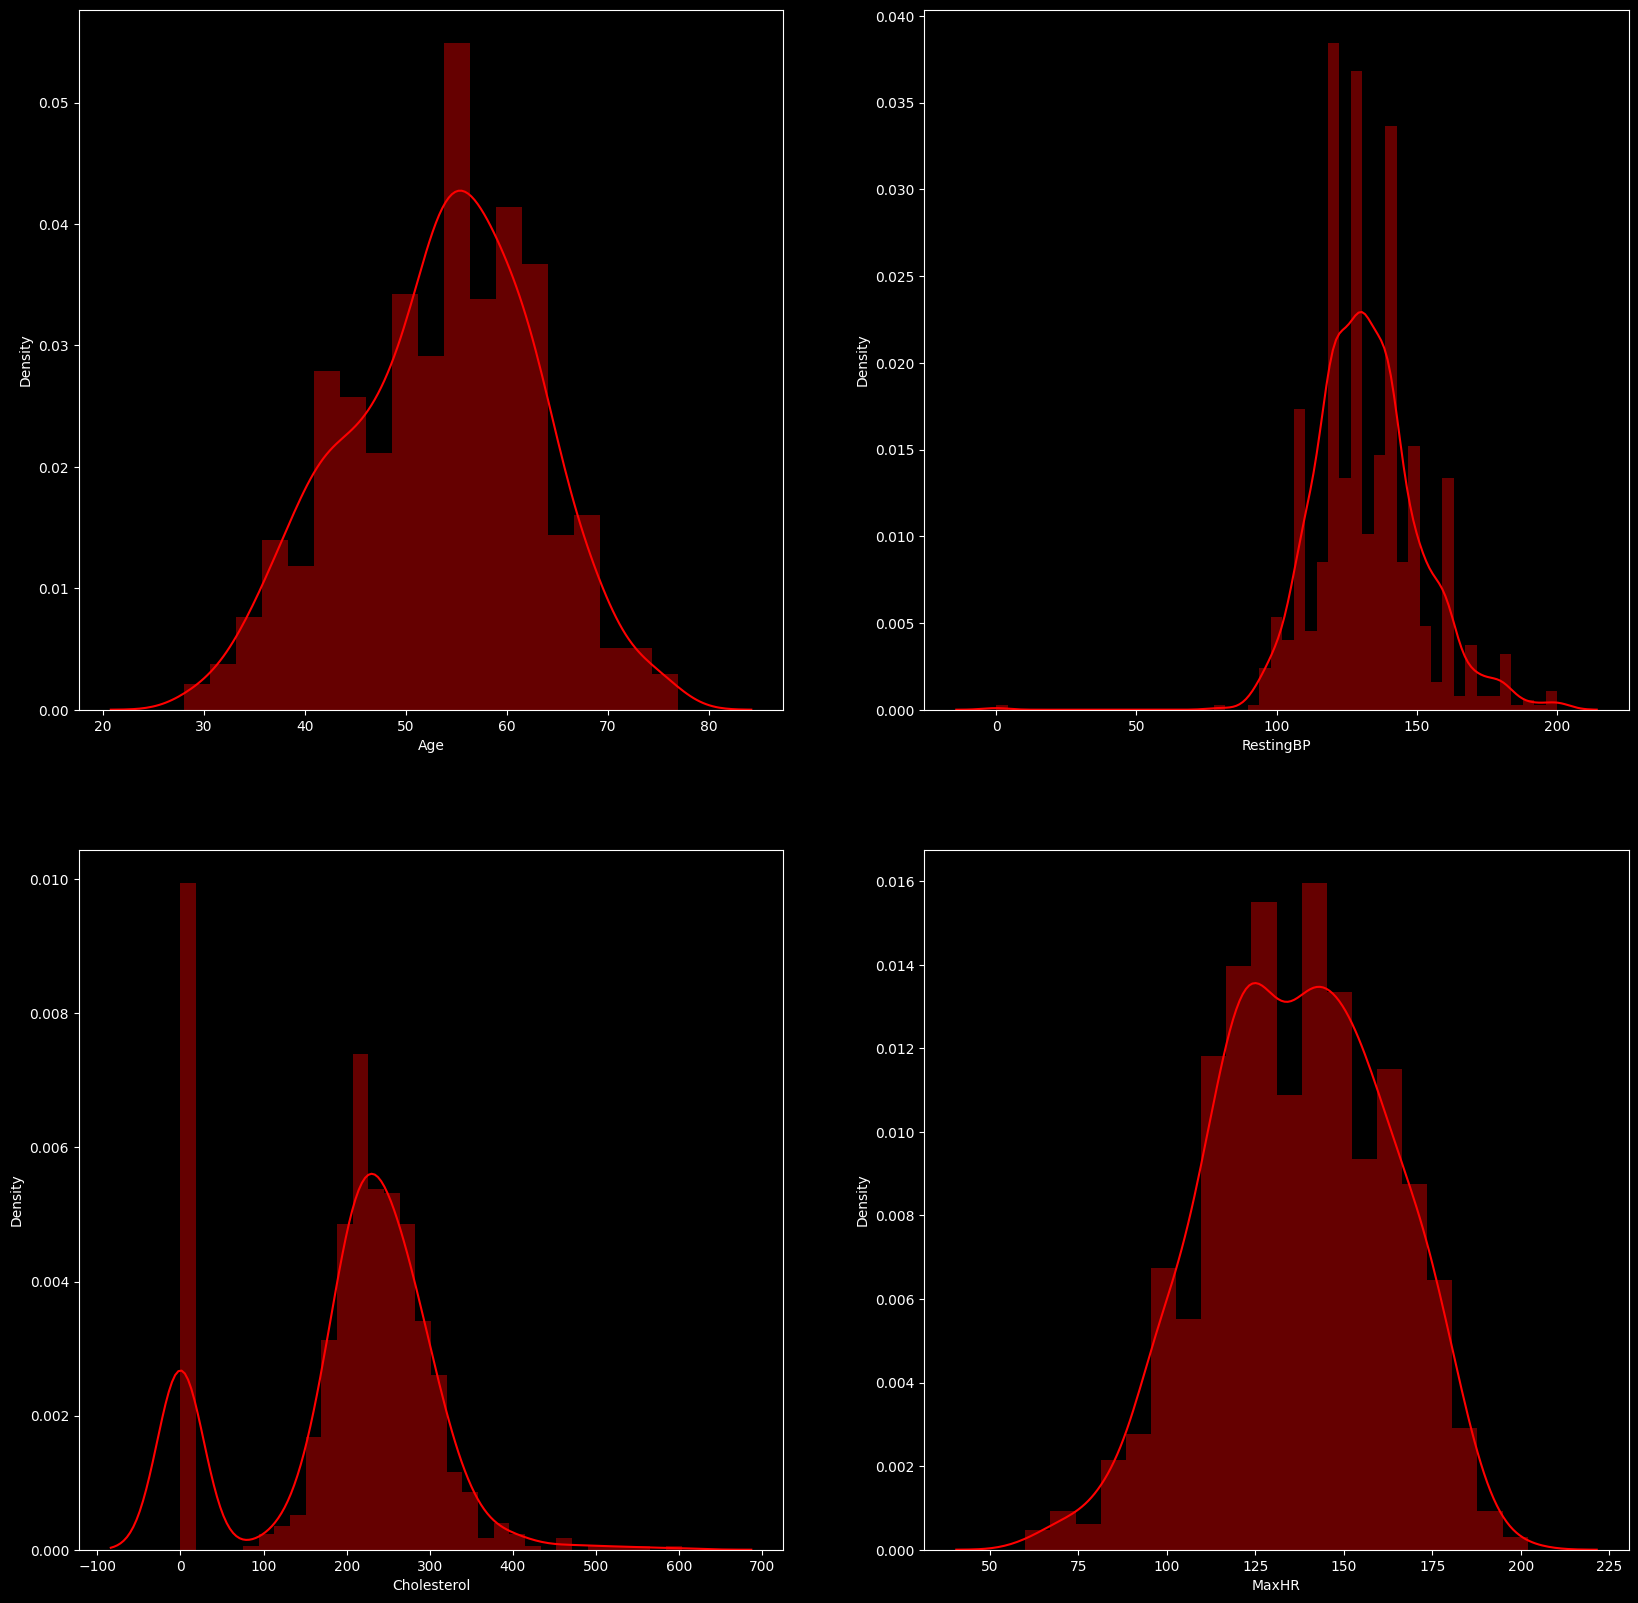

In [97]:
#For continuous variables, plot the density distribution

columns = ['Age','RestingBP','Cholesterol','MaxHR']

fig,ax1 = plt.subplots(2,2,figsize=(20,20))
k = 0
for i in range(2):
  for j in range(2):
    sns.distplot(heart[columns[k]],ax=ax1[i][j],color='red')
    k+=1
plt.show()

In [98]:
#One Hot Encoding = converting categorical variables into binary numeric
encoder = OneHotEncoder(sparse_output=False)

one_hot_encoded = encoder.fit_transform(heart[classColumns])

one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(classColumns))

df_encoded = pd.concat([heart, one_hot_df], axis=1)

heart_encoded = df_encoded.drop(classColumns, axis=1)


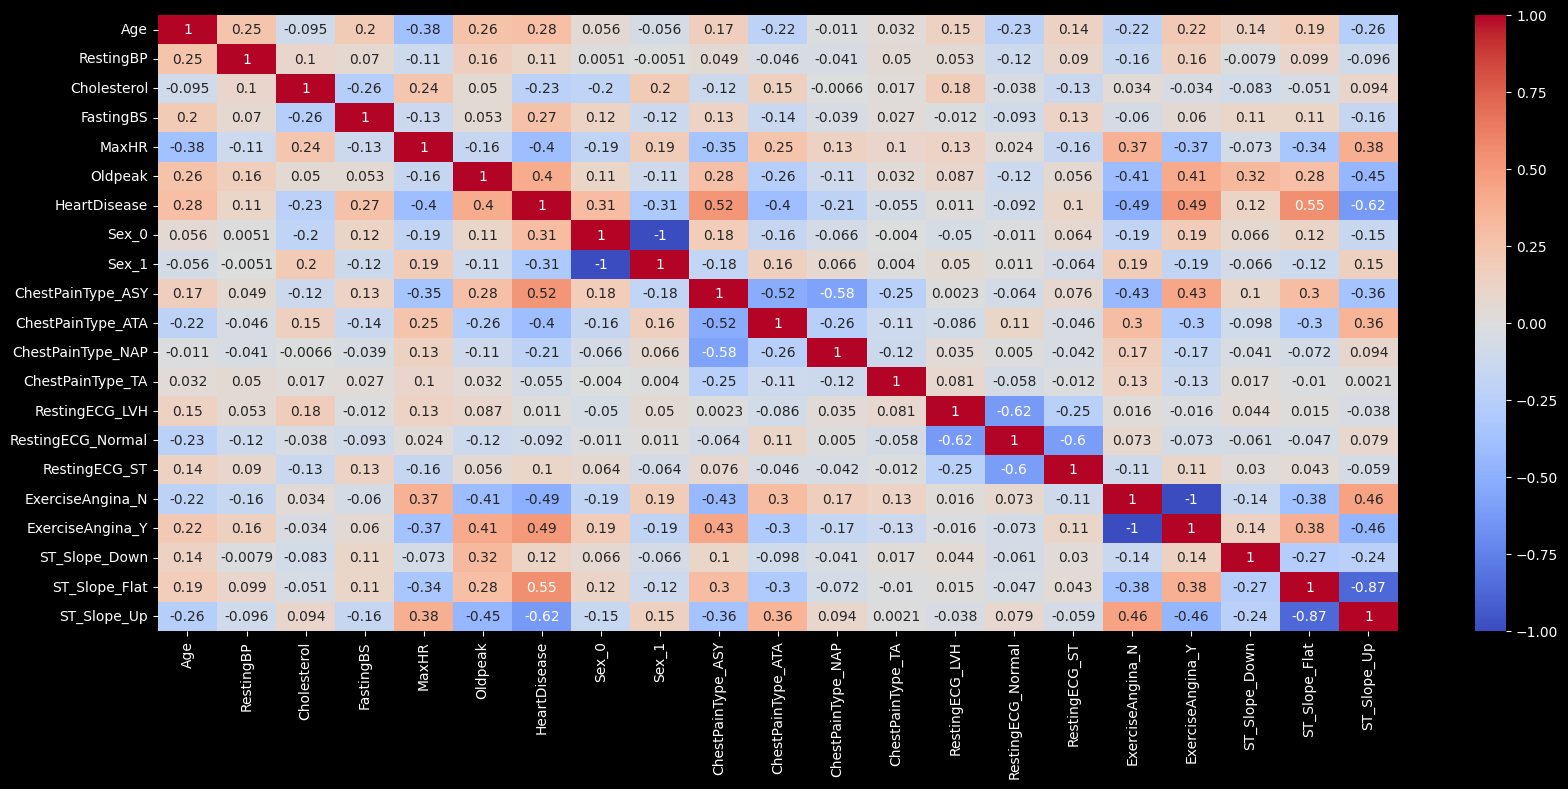

In [99]:
#heatmap of correlations
plt.figure(figsize=(20,8))
corr = heart_encoded.corr()
sns.heatmap(corr,annot=True,cmap="coolwarm")
plt.show()

In [163]:
#machine learning
#split the data set into a training and a testing set
#first separate the x and the y variables into 2 sets
x = heart_encoded.drop('HeartDisease',axis=1)
y = heart_encoded['HeartDisease']


In [165]:
#split the data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=5)


In [166]:
x_train.shape

(734, 20)

In [167]:
x_test.shape

(184, 20)

In [168]:
y_train.shape

(734,)

In [169]:
y_test.shape

(184,)

In [170]:
#create the model
model = LogisticRegression()

In [171]:
#fit the data to the model
model.fit(x_train,y_train)

LogisticRegression()

In [172]:
#run the model to do predictions on the testing data set
y_pred = model.predict(x_test)

In [173]:
y_pred

array([1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0])

In [174]:
y_test

,HeartDisease
236,1
151,0
329,1
416,1
795,0
...,...
892,0
40,0
360,1
863,1


In [175]:
#accuracy score
model.score(x_test,y_test)

0.9239130434782609

In [176]:
#confusion matrix
confusion_matrix(y_test,y_pred)

array([[ 67,   6],
       [  8, 103]])

In [177]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.92      0.91        73
           1       0.94      0.93      0.94       111

    accuracy                           0.92       184
   macro avg       0.92      0.92      0.92       184
weighted avg       0.92      0.92      0.92       184



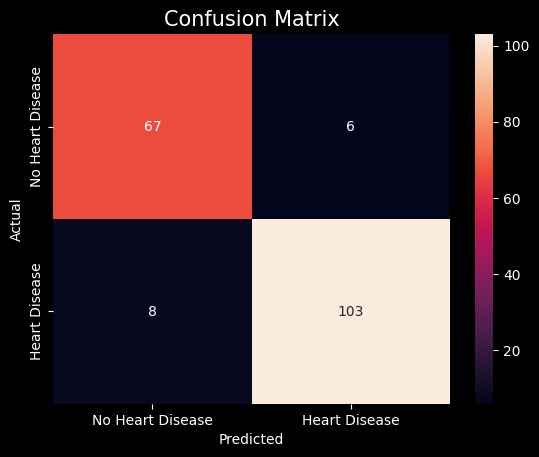

In [183]:
#colorful confusion matrix
cm = confusion_matrix(y_test,y_pred)
class_label = ['No Heart Disease','Heart Disease']
dataCM = pd.DataFrame(cm,index=class_label,columns=class_label)
sns.heatmap(dataCM,annot=True,fmt='d')
plt.title("Confusion Matrix",fontsize=15)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()